In [1]:
import pandas as pd
import matplotlib as mp
import numpy as np

df=pd.read_csv("gdp.csv")
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [2]:
df["Country Name"].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [3]:
df["Year"].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [4]:
df["Value"].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

In [7]:
India_df=df[df["Country Name"]=="India"]

<Axes: xlabel='YEARS', ylabel='GDP'>

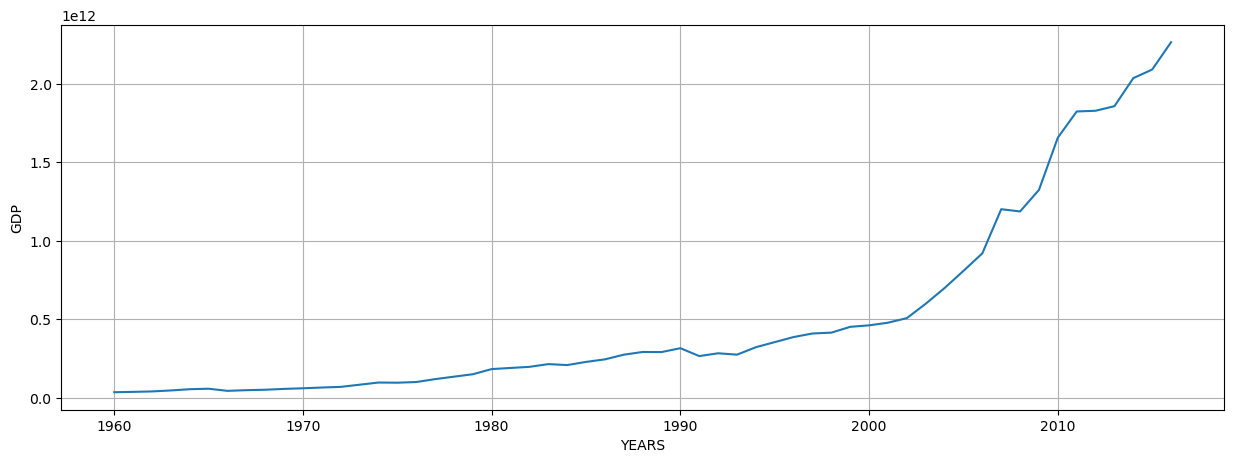

In [24]:
India_df.plot(kind="line",x="Year",y="Value",figsize=(15,5),grid=True,legend=False,xlabel="YEARS",ylabel="GDP")

##GDP GROWTH OF A COUNTRY

In [32]:
data=India_df.values

In [33]:
gdp_change = [0]

for i in range(1,len(data)):  # strting from 1 as first entry no prev data to calculate change
    
    prev = data[i-1][3]
    cur = data[i][3]
    
    gdp_change.append(round(((cur - prev) / prev)*100,2))

In [36]:
len(gdp_change)

57

In [43]:
India_df=India_df.assign(GDP_per = gdp_change)   #ADDING NEW COLUMN IN DATAFRAME

<Axes: xlabel='YEARS', ylabel='GDP'>

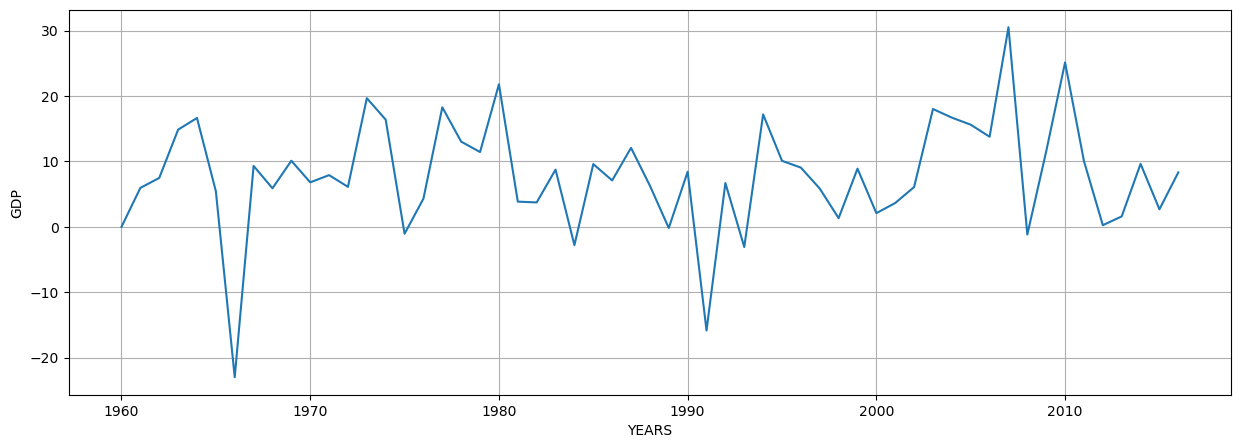

In [46]:
India_df.plot(kind="line",x="Year",y="GDP_per",figsize=(15,5),grid=True,legend=False,xlabel="YEARS",ylabel="GDP")

GDP GROWTH ON WHOLE DATASET

In [51]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [52]:
df = pd.concat(final_data, axis = 0)   #CONACTINATIONG ALL 

In [53]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60
